# AIN 214 - PA2 - FALL 2023

BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE AN UNDERSTANDABLE AND TRACBLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED YO COMMENT ON YOUR RESULTS OR EPXLAIN YOUR REASONING. ALSO, PLEASE DO NO HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT REPORTING IS A KEY STEP IN DATA SCIENCE.

Deadline: 17.11.2023 (23:59:59)

Submission: Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

# THE STUDENT INFO
# Student Name: Bora Dere
# Student ID: 2220765021

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sqlite3 import connect
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

# 1st SET OF QUESTIONS: Skyward Travel Agency Data Management Project

Skyward is a premier travel agency aiming to provide seamless experiences for its clients. As business is booming, the agency has a myriad of data points to keep track of, and they need an efficient way to manage it all. Here's what they're dealing with:

- **Clients' Database**: Skyward has a growing list of clients. For each client, they maintain records of their full name, contact email, and phone number. Every client is assigned a unique client ID for efficient tracking and personalized service.

- **Airline Partnerships**: Skyward has collaborations with several airline companies, each identified by a unique airline ID. Beyond just names, they have comprehensive details of all the flights offered by these airline companies. This flight data includes flight numbers, associated airline IDs, departure cities, destinations, and dates of operation.

- **Hotel Affiliations**: Skyward's clients need places to stay, leading to collaborations with multiple hotels. Each hotel is cataloged with a unique ID, alongside its name, geographical location, and a client feedback rating ranging from 1 to 5.

- **Travel Bookings**: Skyward's primary service involves facilitating travel bookings. Every booking, be it for a flight or hotel, gets recorded. Flight bookings include the specific flight number, the client's ID making the booking, and the booking date. Hotel bookings aren't any different with records of the hotel ID, the client's ID, and the duration of stay (check-in and check-out dates).

- **Feedback Mechanism**: Feedback drives Skyward's quality assurance. Clients are encouraged to leave reviews post their trips. For airlines, each review captures the client's ID, the reviewed airline's ID, and the feedback text. Hotel feedback mirrors this, substituting airlines for hotels.

**Data Provision:**
You are provided with unnormalized `feedback_details_df` and `bookings_df` datasets in the form of CSV files.

**Your Task**:

You should design your own DB schema meeting the above-stated constraints. There are multiple ways to design your tables; you only need to ensure that the design fits the outlined requirements. Begin by clearly defining your schema as tables. Once the schema is established, you will tackle a set of SQL tasks that will be provided separately. The SQL tasks will involve writing queries to extract, modify, or add data based on the designed schema. Good luck! 

**Note: Use sqite3 python package for DB**


## Q1. Design your schema as tables. Draw the necessary tables with the appropriate attributes. State the primary keys, foreign keys (and their references). Create the tables in your schema in the database. (10 Points)

There is no single soluion here, come up with your own design.

# Clients' Database: 
| Field         | Type/Constraints                           |
|---------------|--------------------------------------------|
| CustomerID     | PK, int                          |
| CustomerName     | text                          |
| CustomerEmail     | text                         |
| CustomerPhone     | text                         |
| CustomerID     | FK REFERENCING Airline Feedbacks, int                         |
| CustomerID     | FK REFERENCING Hotel Feedbacks, int                           |

# Hotels:
| Field         | Type/Constraints                           |
|---------------|--------------------------------------------|
| HotelID     | PK, int                          |
| HotelName     | text                          |
| HotelLocation     | text                         |
| HotelRating     | int                         |
| HotelID     | FK REFERENCING Hotel Bookings, int                         |

# Airline Partnerships:
| Field         | Type/Constraints                           |
|---------------|--------------------------------------------|
| AirlineID     | PK, int                          |
| FlightID     | int                          |
| AirlineName     | text                         |
| Flight_Departure     | text                         |
| Flight_Destination     | text                        |
| Flight_Date     | text                          |
| FlightID     | FK REFERENCING Flight Bookings, int                           |

# Flight Bookings:
| Field         | Type/Constraints                           |
|---------------|--------------------------------------------|
| FlightID     | PK, int                          |
| CustomerID     | int                          |
| Flight_Date     | text                         |
| CustomerID     | FK REFERENCING Clients, int                         |
| CustomerID     | FK REFERENCING Airline Feedbacks, int                         |
| CustomerID     | FK REFERENCING Hotel Feedbacks, int                           |

# Hotel Bookings:
| Field         | Type/Constraints                           |
|---------------|--------------------------------------------|
| HotelID     | PK, int                          |
| CustomerID     | int                          |
| CustomerID     | FK REFERENCING Hotels, int                           |
| CustomerID     | FK REFERENCING Clients, int                         |
| CustomerID     | FK REFERENCING Airline Feedbacks, int                         |
| CustomerID     | FK REFERENCING Hotel Feedbacks, int                           |

# Airline Feedbacks:
| Field         | Type/Constraints                           |
|---------------|--------------------------------------------|
| CustomerID     | PK, int                          |
| AirlineID     | int                          |
| Review     | text                         |
| CustomerID     | FK REFERENCING Clients, int                         |
| CustomerID     | FK REFERENCING Airline Feedbacks, int                         |
| CustomerID     | FK REFERENCING Hotel Feedbacks, int                           |

# Hotel Feedbacks:
| Field         | Type/Constraints                           |
|---------------|--------------------------------------------|
| CustomerID     | PK, int                          |
| HotelID     | int                          |
| Review     | text                         |
| CustomerID     | FK REFERENCING Clients, int                         |
| CustomerID     | FK REFERENCING Hotels, int                         |
| CustomerID     | FK REFERENCING Airline Feedbacks, int                         |
| CustomerID     | FK REFERENCING Hotel Bookings, int                           |

# 1- Preparing Dataframes

In [2]:
feedback_details = pd.read_csv('FeedbackDetails.csv')
feedback_details_df = pd.DataFrame(feedback_details)

bookings = pd.read_csv('BookingDetails.csv')
bookings_df = pd.DataFrame(bookings)

# 2- SQL Stuff

In [3]:
conn = sqlite3.connect('skyward.sqlite')
cursor = conn.cursor()

# 3- Database Preparation

## 3.1- Clients' DB
- This database holds information of the exquisite clientele of Skyward. 

### 3.1.1- Clients DataFrame

In [4]:
clients = bookings_df[['CustomerID', 'CustomerName', 'CustomerEmail', 'CustomerPhone']]
clients = clients.drop_duplicates()

### 3.1.2- Clients Table

In [5]:
cursor.execute("DROP TABLE IF EXISTS Clients")

cursor.execute('''
        CREATE TABLE Clients (
               CustomerID INTEGER PRIMARY KEY,
               CustomerName TEXT,
               CustomerEmail TEXT,
               CustomerPhone TEXT,
               FOREIGN KEY (CustomerID) REFERENCES 'Airline Feedbacks'(CustomerID),
               FOREIGN KEY (CustomerID) REFERENCES 'Hotel Feedbacks'(CustomerID)
        )
''')

clients.to_sql('Clients', conn, if_exists='replace', index=False)

500

## 3.2- Hotel affiliations
- This table is to easily organize the hotels that the clients are staying.

### 3.2.1- Hotels DataFrame

In [6]:
hotels = bookings_df[['HotelID', 'HotelName', 'HotelLocation', 'HotelRating']]
hotels = hotels.dropna()

### 3.2.2- Hotels Table

In [7]:
cursor.execute("DROP TABLE IF EXISTS Hotels")

cursor.execute('''
        CREATE TABLE Hotels (
                HotelID INTEGER PRIMARY KEY,
                HotelName TEXT,
                HotelLocation TEXT,
                HotelRating INTEGER,
                FOREIGN KEY (HotelID) REFERENCES 'Hotel Bookings'(HotelID)
        )
''')

hotels.to_sql('Hotels', conn, if_exists='replace', index=False)

488

## 3.3- Airline Partnerships
- To organize the huge collection of airline partnerships of Skyward Agency.

### 3.3.1- Airline Partnerships DataFrame

In [8]:
ap = bookings_df[['AirlineID', 'FlightID', 'AirlineName', 'Flight_Departure', 'Flight_Destination', 'Flight_Date']]
ap = ap.dropna()

### 3.3.2- Airline Partnerships Table

In [9]:
cursor.execute("DROP TABLE IF EXISTS 'Airline Partnerships'")

cursor.execute('''
        CREATE TABLE 'Airline Partnerships' (
               AirlineID INTEGER PRIMARY KEY,
               FlightID INTEGER,
               AirlineName TEXT,
               Flight_Departure TEXT,
               Flight_Destination TEXT,
               Flight_Date TEXT,
               FOREIGN KEY (FlightID) REFERENCES 'Flight Bookings'(FlightID)
        )
''')

ap.to_sql('Airline Partnerships', conn, if_exists='replace', index=False)

508

## 3.4- Flight Bookings
- A seperate table just for flight bookings. 

### 3.4.1- Flight Bookings DataFrame

In [10]:
fb = bookings_df[['FlightID', 'CustomerID', 'Flight_Date']]
fb = fb.dropna()

### 3.4.2- Flight Bookings Table

In [11]:
cursor.execute("DROP TABLE IF EXISTS 'Flight Bookings'")

cursor.execute('''
        CREATE TABLE 'Flight Bookings' (
               FlightID INTEGER PRIMARY KEY,
               CustomerID INTEGER,
               Flight_Date TEXT,
               FOREIGN KEY (CustomerID) REFERENCES Clients(CustomerID),
               FOREIGN KEY (CustomerID) REFERENCES 'Airline Feedbacks'(CustomerID),
               FOREIGN KEY (CustomerID) REFERENCES 'Hotel Feedbacks'(CustomerID)
        )
''')

fb.to_sql('Flight Bookings', conn, if_exists='replace', index=False)

508

## 3.5- Hotel Bookings
- A seperate table just for hotel bookings. 

### 3.5.1- Hotel Bookings DataFrame

In [12]:
hb = bookings_df[['HotelID', 'CustomerID']]
hb = hb.dropna()

### 3.5.2- Hotel Bookings Table

In [13]:
cursor.execute("DROP TABLE IF EXISTS 'Hotel Bookings'")

cursor.execute('''
        CREATE TABLE 'Hotel Bookings' (
               HotelID INTEGER PRIMARY KEY,
               CustomerID INTEGER,
               FOREIGN KEY (CustomerID) REFERENCES Clients(CustomerID),
               FOREIGN KEY (HotelID) REFERENCES Hotels(HotelID),
               FOREIGN KEY (CustomerID) REFERENCES 'Airline Feedbacks'(CustomerID),
               FOREIGN KEY (CustomerID) REFERENCES 'Hotel Feedbacks'(CustomerID)
        )
''')

hb.to_sql('Hotel Bookings', conn, if_exists='replace', index=False)

488

## 3.6- Feedback Mechanism
- Skyward Agency pays special attention to their client's feedback and tries to increase the quality of service. Therefore, feedback mechanism is greatly important.

### 3.6.1- Checking for duplicates in the CustomerID column.
- If there are duplicates, it means there are some customers who gave feedback to both a hotel and an airline firm.

In [14]:
temp = feedback_details_df[['CustomerID']]
org_size = temp.size

temp = temp.drop_duplicates()
dups_dropped_size = temp.size

print(f'There are {org_size} of customer records in the table but when the duplicates are dropped, there remains only {dups_dropped_size}.')

There are 600 of customer records in the table but when the duplicates are dropped, there remains only 361.


> *There are 600 of customer records in the table but when the duplicates are dropped, there remains only 361.*

So, seperating them into two different tables is more convenient.

### 3.6.2- Airline Feedbacks

#### 3.6.2.1- Airline Feedbacks DataFrame

In [15]:
af = feedback_details_df[['CustomerID', 'AirlineID', 'Review']]
af = af.dropna()

#### 3.6.2.2- Airline Feedbacks Table

In [16]:
cursor.execute("DROP TABLE IF EXISTS 'Airline Feedbacks'")

cursor.execute('''
        CREATE TABLE 'Airline Feedbacks' (
               CustomerID INTEGER PRIMARY KEY,
               AirlineID INTEGER,
               Review TEXT,
               FOREIGN KEY (CustomerID) REFERENCES Clients(CustomerID),
               FOREIGN KEY (AirlineID) REFERENCES 'Airline Partnerships'(AirlineID),
               FOREIGN KEY (CustomerID) REFERENCES 'Hotel Feedbacks'(CustomerID)
        )
''')

af.to_sql('Airline Feedbacks', conn, if_exists='replace', index=False)

300

### 3.6.3- Hotel Feedbacks

#### 3.6.3.1- Hotel Feedbacks DataFrame

In [17]:
hf = feedback_details_df[['CustomerID', 'HotelID', 'Review']]
hf = hf.dropna()

#### 3.6.3.2- Hotel Feedbacks Table

In [18]:
cursor.execute("DROP TABLE IF EXISTS 'Hotel Feedbacks'")

cursor.execute('''
        CREATE TABLE 'Hotel Feedbacks' (
               CustomerID INTEGER PRIMARY KEY,
               HotelID INTEGER,
               Review TEXT,
               FOREIGN KEY (CustomerID) REFERENCES Clients(CustomerID),
               FOREIGN KEY (HotelID) REFERENCES Hotels(HotelID),
               FOREIGN KEY (HotelID) REFERENCES 'Hotel Bookings'(HotelID),
               FOREIGN KEY (CustomerID) REFERENCES 'Airline Feedbacks'(CustomerID)
        )
''')

hf.to_sql('Hotel Feedbacks', conn, if_exists='replace', index=False)

300

## Q2. Find the total number of bookings made for each hotel. Display the hotel name and the corresponding number of bookings. (10 Points)

In [19]:
query = """
SELECT HotelName, COUNT(HotelName)
FROM Hotels
GROUP BY HotelID
ORDER BY COUNT(HotelName)
"""

cursor.execute(query)
cursor.fetchall()

[('Opal Inn', 4),
 ('Opal Motel', 4),
 ('Jade Motel', 5),
 ('Pearl Lodge', 5),
 ('Diamond Plaza', 6),
 ('Golden Resort', 6),
 ('Jade Suites', 6),
 ('Jade Suites', 7),
 ('Golden Retreat', 7),
 ('Pearl Motel', 7),
 ('Ruby Resort', 7),
 ('Silver Palace', 8),
 ('Sapphire Villa', 8),
 ('Pearl Hideaway', 8),
 ('Ruby Hideaway', 8),
 ('Ruby Plaza', 8),
 ('Ruby Palace', 8),
 ('Pearl Plaza', 8),
 ('Golden Lodge', 8),
 ('Golden Plaza', 8),
 ('Emerald Resort', 9),
 ('Opal Suites', 9),
 ('Jade Lodge', 9),
 ('Golden Hideaway', 9),
 ('Jade Retreat', 9),
 ('Silver Villa', 10),
 ('Diamond Villa', 10),
 ('Opal Plaza', 10),
 ('Jade Suites', 10),
 ('Sapphire Hideaway', 10),
 ('Diamond Suites', 10),
 ('Golden Villa', 10),
 ('Opal Motel', 11),
 ('Jade Resort', 11),
 ('Crystal Motel', 11),
 ('Sapphire Suites', 11),
 ('Silver Hideaway', 11),
 ('Pearl Resort', 12),
 ('Golden Resort', 12),
 ('Sapphire Motel', 12),
 ('Sapphire Villa', 14),
 ('Golden Inn', 14),
 ('Diamond Inn', 14),
 ('Diamond Inn', 14),
 ('Emera

## Q3. Retrieve the name and contact details of clients who have provided feedback for both flights and hotels. Ensure there are no duplicate entries in your result. (10 Points)


In [20]:
query = """
SELECT CustomerName, CustomerEmail, CustomerPhone
FROM Clients
WHERE CustomerID IN (SELECT CustomerID FROM 'Airline Feedbacks') AND CustomerID IN (SELECT CustomerID FROM 'Hotel Feedbacks')
"""

cursor.execute(query)
result = cursor.fetchall()
result

[('Ethan Martinez', 'ethan.martinez@mail.com', '555-3339628'),
 ('Sophia Davis', 'sophia.davis@mail.com', '555-7585879'),
 ('Liam Miller', 'liam.miller@mail.com', '555-3750839'),
 ('Mason Brown', 'mason.brown@mail.com', '555-4291570'),
 ('Ethan Smith', 'ethan.smith@mail.com', '555-4014268'),
 ('Olivia Martinez', 'olivia.martinez@mail.com', '555-3255322'),
 ('Liam Brown', 'liam.brown@mail.com', '555-3328325'),
 ('Olivia Miller', 'olivia.miller@mail.com', '555-7935514'),
 ('Ethan Rodriguez', 'ethan.rodriguez@mail.com', '555-7714590'),
 ('Liam Martinez', 'liam.martinez@mail.com', '555-3004787'),
 ('Mason Brown', 'mason.brown@mail.com', '555-0826096'),
 ('Ethan Miller', 'ethan.miller@mail.com', '555-7366655'),
 ('Mia Williams', 'mia.williams@mail.com', '555-4798996'),
 ('John Smith', 'john.smith@mail.com', '555-3493476'),
 ('Emma Smith', 'emma.smith@mail.com', '555-0707146'),
 ('Mason Brown', 'mason.brown@mail.com', '555-3196635'),
 ('John Davis', 'john.davis@mail.com', '555-5153122'),
 ('

To ensure that there are no duplicates, we can remove the duplicates from the list *result* and then check if its length changes.

In [21]:
l_size = len(result)

# Since converting a list to a set removes duplicates

s_size = len(set(result))

print(s_size == l_size)

True


>  *True*

So, we can be assured that there are no duplicates.

## Q4. Identify hotels that have a feedback rating lower than the average feedback rating across all hotels. List their names and ratings. (10 Points)


In [22]:
query = """
SELECT HotelName, HotelRating
FROM Hotels
WHERE HotelRating < (SELECT AVG(HotelRating) FROM Hotels)
"""

cursor.execute(query)
cursor.fetchall()

[('Pearl Resort', 2.0),
 ('Golden Resort', 3.0),
 ('Ruby Palace', 1.0),
 ('Golden Resort', 1.0),
 ('Golden Villa', 3.0),
 ('Sapphire Suites', 2.0),
 ('Opal Plaza', 2.0),
 ('Diamond Plaza', 2.0),
 ('Diamond Inn', 2.0),
 ('Golden Hideaway', 3.0),
 ('Golden Resort', 1.0),
 ('Jade Resort', 2.0),
 ('Golden Inn', 3.0),
 ('Golden Lodge', 2.0),
 ('Opal Plaza', 2.0),
 ('Jade Motel', 2.0),
 ('Jade Resort', 2.0),
 ('Golden Inn', 3.0),
 ('Golden Villa', 3.0),
 ('Sapphire Villa', 2.0),
 ('Opal Plaza', 2.0),
 ('Opal Suites', 1.0),
 ('Opal Inn', 1.0),
 ('Pearl Lodge', 1.0),
 ('Golden Inn', 3.0),
 ('Golden Resort', 3.0),
 ('Sapphire Suites', 2.0),
 ('Pearl Lodge', 1.0),
 ('Pearl Plaza', 2.0),
 ('Golden Inn', 3.0),
 ('Golden Hideaway', 3.0),
 ('Opal Suites', 1.0),
 ('Opal Plaza', 2.0),
 ('Emerald Resort', 3.0),
 ('Sapphire Villa', 2.0),
 ('Silver Palace', 2.0),
 ('Golden Resort', 1.0),
 ('Jade Resort', 2.0),
 ('Pearl Hideaway', 1.0),
 ('Golden Villa', 3.0),
 ('Diamond Plaza', 2.0),
 ('Golden Resort', 1

## Q5. Find clients who have stayed in at least three different hotels and flown with at least two different airlines. Display their names and total number of bookings. (10 Points)


In [23]:
query = """
SELECT CustomerName
FROM Clients
WHERE CustomerID = (SELECT CustomerID 
                    FROM 'Flight Bookings' 
                    GROUP BY CustomerID
                    HAVING COUNT(DISTINCT FlightID) >= 2) AND
      CustomerID = (SELECT CustomerID
                    FROM 'Hotel Bookings' 
                    GROUP BY CustomerID
                    HAVING COUNT(DISTINCT HotelID) >= 3)
"""

cursor.execute(query)
cursor.fetchall()

[]

## Q6 - **Bonus/Challenge**: Do the same in Q3 without using the keywords: "HAVING" and "GROUP BY". Make a comparison on the two processes (one using the aggregate operators and this) 

In [24]:
# :)

# 2nd SET OF QUESTIONS: DATA ANALYSIS WITH VISUALIZATION TOOLS

In the 2nd part of this hw, you are to deal with the famous dataset of Titanic [1]. Answer the following questions, using visualization tools, and comment on your work.

## Q1. Read the Titanic dataset into a DataFrame. Using a pivot table, analyze the survival rate by gender and class.


In [25]:
titanic = pd.read_csv('titanic.csv')
titanic_df = pd.DataFrame(titanic)

In [26]:
survival = titanic_df.groupby(['Pclass', 'Sex'])['Survived']
survival = survival.agg(['mean']).round(2)
survival = pd.DataFrame(survival)

pd.pivot_table(survival, values='mean', index='Pclass', columns='Sex')

Sex,female,male
Pclass,,
1,0.97,0.37
2,0.92,0.16
3,0.50,0.14


As observed, women have a drastically better rate of survival. There may be several reasons to that. If the women population was extremely small compared to the men population, then that kind of an asymmetric distribution may be the cause of that. Or women just might be more prioritized, along the kids. Also ve observe that the survival rate increases as the class gets better. That may be caused by the services and the opportunities getting better and better as the class increases.

## Q2. Create a histogram showcasing the age distribution of passengers. Overlay this with a KDE plot. Comment on the most common age group aboard the Titanic.


<AxesSubplot: xlabel='Age', ylabel='Count'>

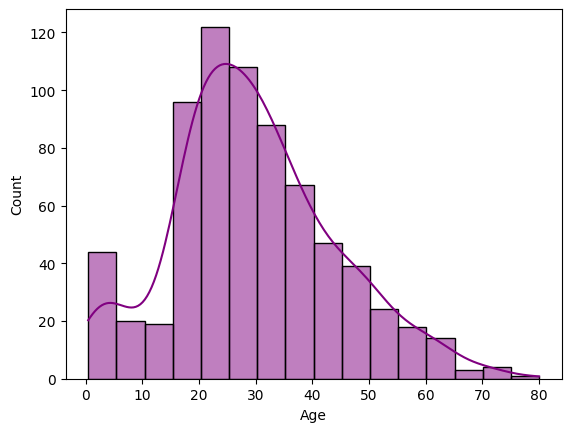

In [27]:
sns.histplot(titanic_df, x='Age', kde=True, binwidth=5, color='purple')

Since the bindwith is 5, it can clearly be said that the most common age group was 15-45 abroad the Titanic. Observing the age distribution and considering the fact that the Titanic incident occured in 1912, its passengers were most likely to be from working-class, generally.

Also, relatively high valued 0-5 range can be interpreted as the Titanic was also used in family transportation since clearly, no baby can travel by itself. 

## Q3. Using a pie chart, illustrate the embarkation points for Titanic passengers. Identify the port with the highest boarding. Analyze the age and sex distribution from this port. Does this distribution reflect the "women and children first" evacuation policy?

([<matplotlib.patches.Wedge at 0x1c6542fdcd0>,
 [Text(1.0047769934806399, 0.4476864900485679, 'C'),
  Text(0.31016951767675205, 1.0553648043705888, 'Q'),
  Text(-0.924531747842561, -0.7650104883144933, 'S')],
 [Text(0.6394035413058616, 0.28489140275817953, '18.9%'),
  Text(0.19738060215793307, 0.6715957845994655, '8.7%'),
  Text(-0.6163544985617071, -0.5100069922096622, '72.4%')])

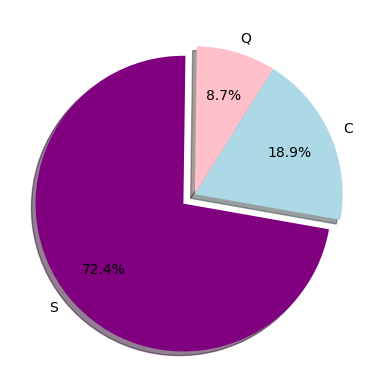

In [28]:
embarkation = titanic_df.groupby('Embarked')['PassengerId'].count()
embarkation = dict(embarkation)
plt.pie(embarkation.values(), labels=embarkation.keys(), autopct='%1.1f%%', shadow=True, colors=['lightblue', 'pink', 'purple'], pctdistance=.7, explode=[0, 0, .1], startangle=350)

It is clearly seen that the port S was the most used one. So, let's examine the stats of this port a bit deeper.

<AxesSubplot: xlabel='Age', ylabel='Count'>

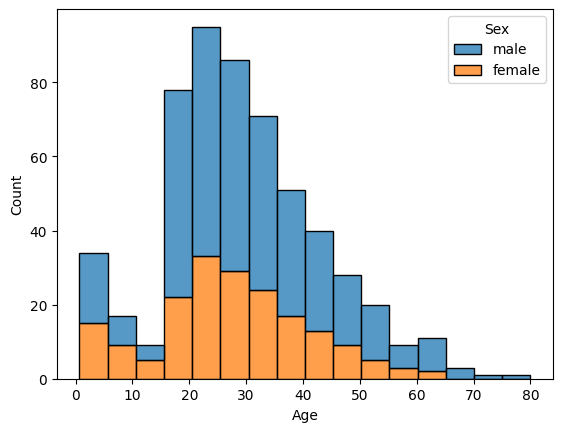

In [29]:
sex = titanic_df[titanic['Embarked'] == 'S']
sex = sex[['Sex', 'Age']]
sns.histplot(sex, x='Age', hue='Sex', multiple='stack', binwidth=5)

We cannot say if the "women and children first" policy was applied because this data only gives us the distribution of the evacuated people based on their ages and genders. We can clearly say that men and working class is dominant but it does not give us any clue about the order of the evacuation. 

Since there are more of the working class passengers (it can be seen in the plot of Q2) it is completely understandable to have an age distribution like this in any of those embarkment points.

([<matplotlib.patches.Wedge at 0x1c6779e6210>,
 [Text(-0.9838646807152013, -0.4919454136803953, 'Male'),
  Text(1.046474202315867, 0.5232511288925903, 'Female')],
 [Text(-0.6260957059096735, -0.3130561723420697, '64.8%'),
  Text(0.6887052442591602, 0.3443618540575167, '35.2%')])

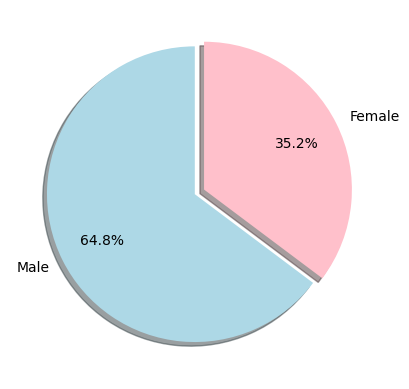

In [30]:
plt.pie(titanic_df.value_counts('Sex'), labels=['Male', 'Female'], autopct='%1.1f%%', shadow=True, colors=['lightblue', 'pink'], pctdistance=.7, explode=[0, .07], startangle=90)

And if we were to examine the sex distribution of the Titanic, we can observe that the men were always the dominant sex. 

([<matplotlib.patches.Wedge at 0x1c677a56a90>,
 [Text(-0.9198003072098782, -0.6032971033053398, 'Male'),
  Text(0.978332993953085, 0.6416888287501918, 'Female')],
 [Text(-0.5853274682244679, -0.3839163384670343, '68.5%'),
  Text(0.6438601755075858, 0.4223080325962801, '31.5%')])

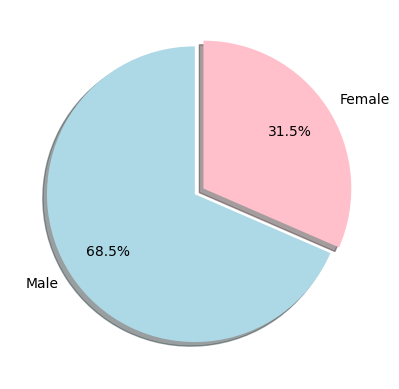

In [31]:
plt.pie(sex.value_counts('Sex'), labels=['Male', 'Female'], autopct='%1.1f%%', shadow=True, colors=['lightblue', 'pink'], pctdistance=.7, explode=[0, .07], startangle=90)

And it changes **slightly** in the S embarkment point. So slight that this change does not tell us anything.

In [32]:
print(f"There were {titanic_df[['PassengerId']].size} passengers on the Titanic and {titanic_df[['Embarked']].isnull().sum().iloc[0]} of them did/could not reach the embarkment points.")

There were 891 passengers on the Titanic and 2 of them did/could not reach the embarkment points.


*There were 891 passengers on the Titanic and 2 of them did/could not reach the embarkment points.*

We might be able to say anything about the priority policy but only 2 passengers did/could not made it to the embarkment points. This number is both so small to make an assumption with it and would not even matter eitherway, since it is impossible to know if those passengers were not able to make it or just could not, because of some faulty priority policy.

## Q4. Create a scatter plot comparing age and fare. Comment on any correlations or patterns you observe.

<AxesSubplot: xlabel='Age', ylabel='Fare'>

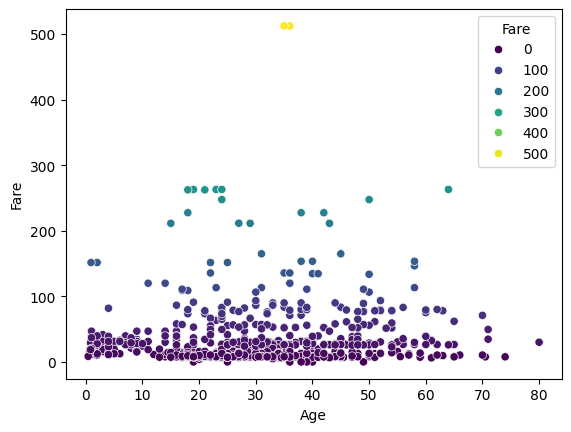

In [33]:
sns.scatterplot(titanic_df, x='Age', y='Fare', hue='Fare', palette='viridis')

At first glance, this scatter plot may seem uninformative but digging deeper, we might come to some important conclusions. For example, same fares for close age values may indicate to a couple, bought the same kind of tickets. Or, let's examine the most expensive tickets. We cannot read the actual value of it but we know it is greater than 500. So, let's work with it.

In [34]:
richest = titanic_df[titanic_df['Fare'] > 500]
richest

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


Interesting, there are 3 passengers with the most expensive tickets, which happens to be the same ticket actually. Those names may seem unrelated but when we do a bit of research, we learn that both Annie Moore Ward and Louis Gustave Joseph Lesueur were working for Thomas Cardeza, who -unsurprisingly- also has the same ticket number.

Therefore, those correlations may not be about the SES (socio-economic status) all the time but they sure give valuable info if you know how to interpret them.

## Q5. Group the dataset by 'Embarked' and 'Pclass' and visualize the mean fare for each combination using a bar chart. Comment on the fare differences based on embarkation ports and classes.


<AxesSubplot: xlabel='Embarked', ylabel='Fare'>

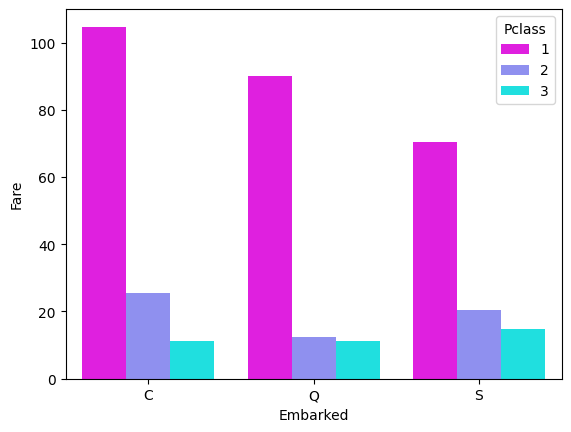

In [35]:
grouped = pd.DataFrame(titanic_df.groupby(['Embarked', 'Pclass'])['Fare'].mean())
sns.barplot(grouped, x='Embarked', y='Fare', hue='Pclass', palette='cool_r')

As the class gets better and better, fare increases, that is expected. Going from class 3 to 2, there is little to no change actually. But from 2 to 1, there is a tremendous increase in terms of fare. Same kind of application can be seen in today's travel options too, it's nothing unexpected.

Embarkation points do not really make that much of a difference, it seems. At least when compared to the dramatic jump of the Pclass 2 -> Pclass 1 direction. Order, location etc. of those embarkation points may have some affects on the fare but we cannot directly say that using only the data we are given.  

# PLAGIARISM POLICY

In the interest of maintaining a fair and honest academic environment, this course strictly adheres to a zero-tolerance policy regarding plagiarism. 
Accordingly, all assignments must reflect individual effort and understanding. While abstract discussions with peers about concepts are encouraged, sharing or copying specific solutions, code, or pseudocode is not permitted and will be treated as plagiarism. This policy includes work sourced from the internet, publications, and AI tools like ChatGPT and GitHub Copilot. **USE THEM RESPONSIBLY**. For example, you can utilize them to enhance understanding and support your original work, not to replace it. Submitting work that is not entirely your own creation will be regarded as a violation of academic integrity. It is vital to use all resources, including AI, in a manner that supports your educational development without compromising the principles of academic honesty. 

If in doubt, do not hesitate to seek guidance from the course staff - we are here to help, with an aim to foster a learning environment based on trust, respect, and responsibility.


# REFERENCES
[1] Kaggle. (2023). Titanic: Machine Learning from Disaster [Data set]. Kaggle Inc. https://www.kaggle.com/c/titanic/data

# ACKNOWLEDGMENTS

• The design and development of this homework have been assisted by AI tools, with a special mention to ChatGPT for its assistance in conceptualizing the assignment and refining the wording. 
